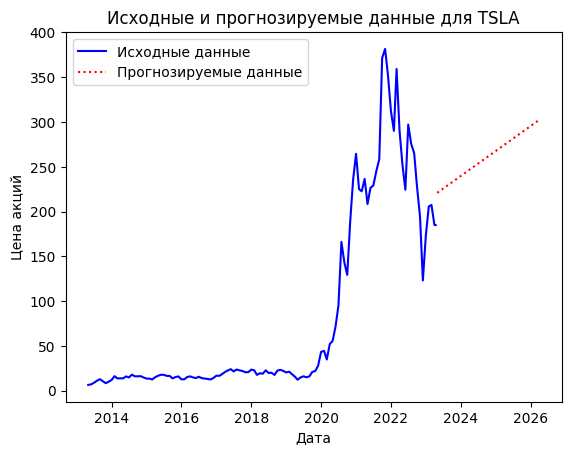

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from datetime import datetime

# Загрузка данных из файла CSV
data = pd.read_csv('/content/TSLA.csv')

# Преобразование дат в datetime
data['Date'] = pd.to_datetime(data['Date'])

# Подготовка данных для обучения модели
X_train = data['Date'].apply(lambda x: x.timestamp()).values.reshape(-1, 1)
y_train = data['Close'].values

# Обучение модели
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Предсказание цен акций на следующие 36 месяцев
current_month = pd.to_datetime('2023-04-01')
predicted_prices = []
for i in range(1, 37):
    next_month = current_month + pd.offsets.MonthEnd(i)
    next_month_timestamp = next_month.timestamp()
    next_month_price = regressor.predict([[next_month_timestamp]])
    predicted_prices.append(round(next_month_price[0], 2))

# Создание фрейма данных с предсказанными ценами
date_range = pd.date_range(start=current_month + pd.offsets.MonthEnd(1), periods=36, freq='M').tolist()
predicted_data = pd.DataFrame({'Date': date_range, 'Close': predicted_prices})

# Объединение данных в один DataFrame
all_data = pd.concat([data, predicted_data])

# Преобразование дат в datetime
all_data['Date'] = pd.to_datetime(all_data['Date'])

# Отображение исходных и прогнозируемых данных
fig, ax = plt.subplots()
ax.plot(all_data['Date'][:len(data)], data['Close'], label='Исходные данные', color='blue')
ax.plot(all_data['Date'][len(data):], all_data['Close'][len(data):], label='Прогнозируемые данные', color='red', linestyle=':',)

# Добавление подписей осей и легенды
ax.set_xlabel('Дата')
ax.set_ylabel('Цена акций')
ax.set_title('Исходные и прогнозируемые данные для TSLA')
ax.legend()

# Отображение графика
plt.show()


# Новый раздел

In [ ]:
df = pd.read_csv("/content/TSLA.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-05-01,3.732667,7.660000,3.533333,6.517333,6.517333,4968313500
1,2013-06-01,6.508000,7.350000,5.883333,7.157333,7.157333,2686720500
2,2013-07-01,7.290667,9.166000,6.966667,8.952000,8.952000,3442923000
3,2013-08-01,9.000000,11.533333,8.824000,11.266667,11.266667,3888999000
4,2013-09-01,11.560000,12.966667,10.567333,12.891333,12.891333,2568159000
...,...,...,...,...,...,...,...
116,2023-01-01,118.470001,180.679993,101.809998,173.220001,173.220001,3897499400
117,2023-02-01,173.889999,217.649994,169.929993,205.710007,205.710007,3624845100
118,2023-03-01,206.210007,207.789993,163.910004,207.460007,207.460007,3311255500
119,2023-04-01,199.910004,202.690002,176.110001,185.000000,185.000000,1171171400


In [ ]:
import matplotlib.pyplot as plt

# Отображаем исходные данные
plt.plot(data['Date'], data['Close'], label='Исходные данные')


# Отображаем прогнозируемые данные
plt.plot(pd.to_datetime(data['Date'], unit='s'), data['Close'], label='Исходные данные')

# Добавляем подписи осей и легенду
plt.xlabel('Дата')
plt.ylabel('Цена акций')
plt.legend()

# Отображаем график
plt.show()


ValueError: ignored

<Figure size 640x480 with 1 Axes>